
File path........: /usr/local/lib/python3.6/dist-packages/pydicom/data/test_files/CT_small.dcm
SOP Class........: 1.2.840.10008.5.1.4.1.1.2 (CT Image Storage)

Patient's Name...: CompressedSamples, CT1
Patient ID.......: 1CT1
Modality.........: CT
Study Date.......: 20040119
Image size.......: 128 x 128
Pixel Spacing....: [0.661468, 0.661468]
Slice location...: -77.2040634155


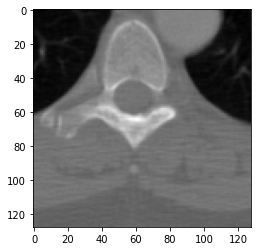

In [ ]:
"""

open a DICOM file, print some dataset
information, and show it using matplotlib

"""

# authors : Guillaume Lemaitre <g.lemaitre58@gmail.com>
# license : MIT


#testowy plik CT

import matplotlib.pyplot as plt
!pip install pydicom
from pydicom import dcmread
from pydicom.data import get_testdata_file

fpath = get_testdata_file('CT_small.dcm')
ds = dcmread(fpath)

# Normal mode:
print()
print(f"File path........: {fpath}")
print(f"SOP Class........: {ds.SOPClassUID} ({ds.SOPClassUID.name})")
print()

pat_name = ds.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print(f"Patient's Name...: {display_name}")
print(f"Patient ID.......: {ds.PatientID}")
print(f"Modality.........: {ds.Modality}")
print(f"Study Date.......: {ds.StudyDate}")
print(f"Image size.......: {ds.Rows} x {ds.Columns}")
print(f"Pixel Spacing....: {ds.PixelSpacing}")

# use .get() if not sure the item exists, and want a default value if missing
print(f"Slice location...: {ds.get('SliceLocation', '(missing)')}")

# plot the image using matplotlib
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

File path........: /content/drive/My Drive/2014_2014-03-25-08-35-37_1.dcm

Patient's Name...: CompressedSamples, CT1
Patient ID.......: N/A
Modality.........: US
Study Date.......: 20140325
Image size.......: 904 x 1208
Pixel Spacing....: [0.014979, 0.015000]
Slice location...: (missing)


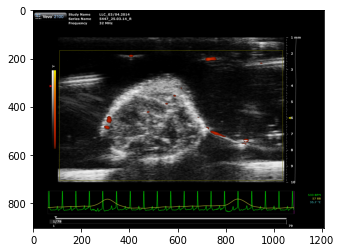

In [ ]:
"""

open a DICOM file, print some dataset
information, and show it using matplotlib

"""

# authors : Guillaume Lemaitre <g.lemaitre58@gmail.com>
# license : MIT

from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
!pip install pydicom
from pydicom import dcmread
from pydicom.data import get_testdata_file

#'\dicomvol2\2014_2014-03-25-08-35-37_1.dcm'
fpath = r"/content/drive/My Drive/2014_2014-03-25-08-35-37_1.dcm"
ds = dcmread((fpath), force=True)

# Normal mode:
print()
print(f"File path........: {fpath}")
#print(f"SOP Class........: {ds.SOPClassUID} ({ds.SOPClassUID.name})")
print()

pat_name = ds.PatientName
#display_name = pat_name.family_name + ", " + pat_name.given_name
print(f"Patient's Name...: {display_name}")
print(f"Patient ID.......: {ds.PatientID}")
print(f"Modality.........: {ds.Modality}")
print(f"Study Date.......: {ds.StudyDate}")
print(f"Image size.......: {ds.Rows} x {ds.Columns}")
print(f"Pixel Spacing....: {ds.PixelSpacing}")

# use .get() if not sure the item exists, and want a default value if missing
print(f"Slice location...: {ds.get('SliceLocation', '(missing)')}")

# plot the image using matplotlib
#plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.imshow(ds.pixel_array[0,:,:,:], cmap=plt.cm.gray)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


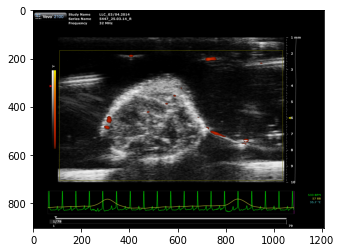

In [ ]:
#https://gist.github.com/somada141/8dd67a02e330a657cf9e

!pip install pydicom
import pydicom as dicom
import os
import numpy

from google.colab import drive
drive.mount('/content/drive')

#PathDicom = "./dir_with_dicom_series/"
#PathDicom = r"/content/"
PathDicom = r"/content/drive"

lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
            
# Get ref file
RefDs = dicom.read_file(lstFilesDCM[0])

RefDs = dicom.read_file("/content/drive/My Drive/2014_2014-03-25-08-35-37_1.dcm")
# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
#ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

# The array is sized based on 'ConstPixelDims'
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
rd = ArrayDicom.reshape(904, 1208)
rd.shape

# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = dicom.read_file(filenameDCM)
    # store the raw image data
    plt.imshow(ds.pixel_array[0,:,:,:], cmap=plt.cm.gray)
    #ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array
    #rd[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array